In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
sns.set()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  *
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import DenseNet121, VGG19, ResNet50


import PIL.Image
import matplotlib.pyplot as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image


from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")


from sklearn.utils import shuffle


train_df = pd.read_csv('/content/drive/MyDrive/Coronahack-Chest-XRay-Dataset/Chest_xray_Corona_Metadata.csv')
train_df.shape

train_df.head(5)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


<Axes: >

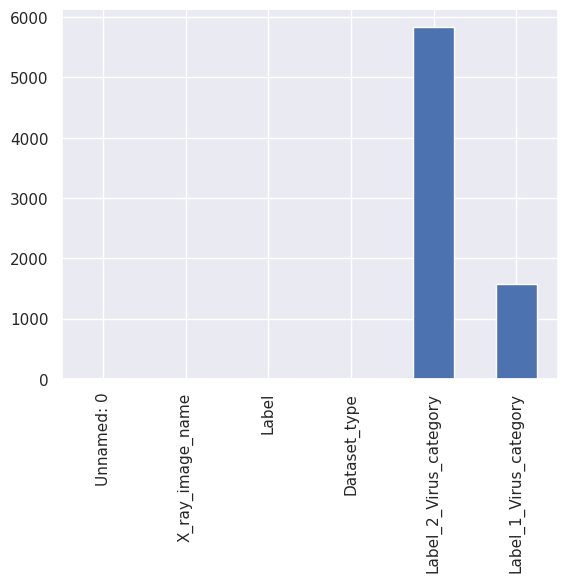

In [7]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')

In [8]:
train_df.dropna(how = 'all')
train_df.isnull().sum()

,0
Unnamed: 0,0
X_ray_image_name,0
Label,0
Dataset_type,0
Label_2_Virus_category,5841
Label_1_Virus_category,1576


In [9]:
train_df.fillna('unknown', inplace=True)
train_df.isnull().sum()

,0
Unnamed: 0,0
X_ray_image_name,0
Label,0
Dataset_type,0
Label_2_Virus_category,0
Label_1_Virus_category,0


In [10]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5299,5322,IM-0005-0001.jpeg,Normal,TEST,unknown,unknown
5573,5596,person147_bacteria_705.jpeg,Pnemonia,TEST,unknown,bacteria
5483,5506,NORMAL2-IM-0081-0001.jpeg,Normal,TEST,unknown,unknown
5815,5838,person42_virus_89.jpeg,Pnemonia,TEST,unknown,Virus
5316,5339,NORMAL2-IM-0028-0001.jpeg,Normal,TEST,unknown,unknown
5695,5718,person108_bacteria_506.jpeg,Pnemonia,TEST,unknown,bacteria
5637,5660,person125_bacteria_594.jpeg,Pnemonia,TEST,unknown,bacteria
5593,5616,person139_bacteria_665.jpeg,Pnemonia,TEST,unknown,bacteria
5319,5342,NORMAL2-IM-0019-0001.jpeg,Normal,TEST,unknown,unknown
5394,5417,NORMAL2-IM-0313-0001.jpeg,Normal,TEST,unknown,unknown


In [11]:
print((train_df['Label_1_Virus_category']).value_counts())
print('--------------------------')
print((train_df['Label_2_Virus_category']).value_counts())

Label_1_Virus_category
bacteria          2777
unknown           1576
Virus             1555
Stress-Smoking       2
Name: count, dtype: int64
--------------------------
Label_2_Virus_category
unknown          5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: count, dtype: int64


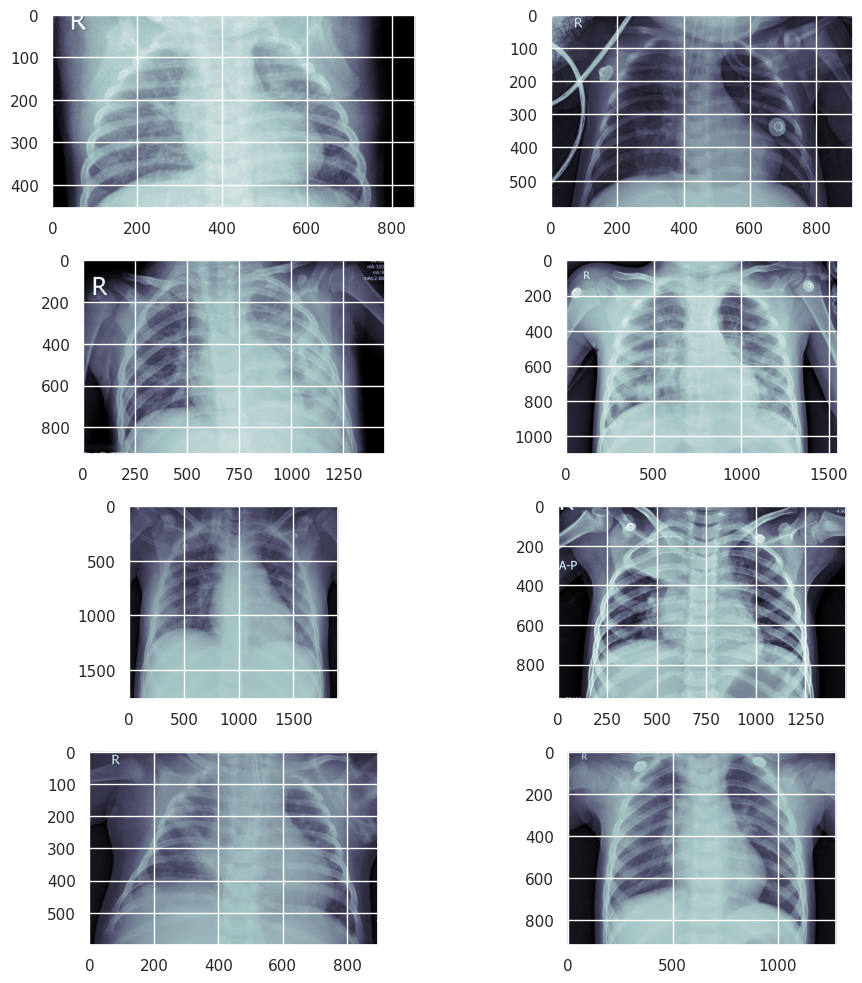

In [13]:
test_img_dir = '/content/drive/MyDrive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
train_img_dir = '/content/drive/MyDrive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))

sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))

plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_train_images):
    image = PIL.Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)

plt.tight_layout()

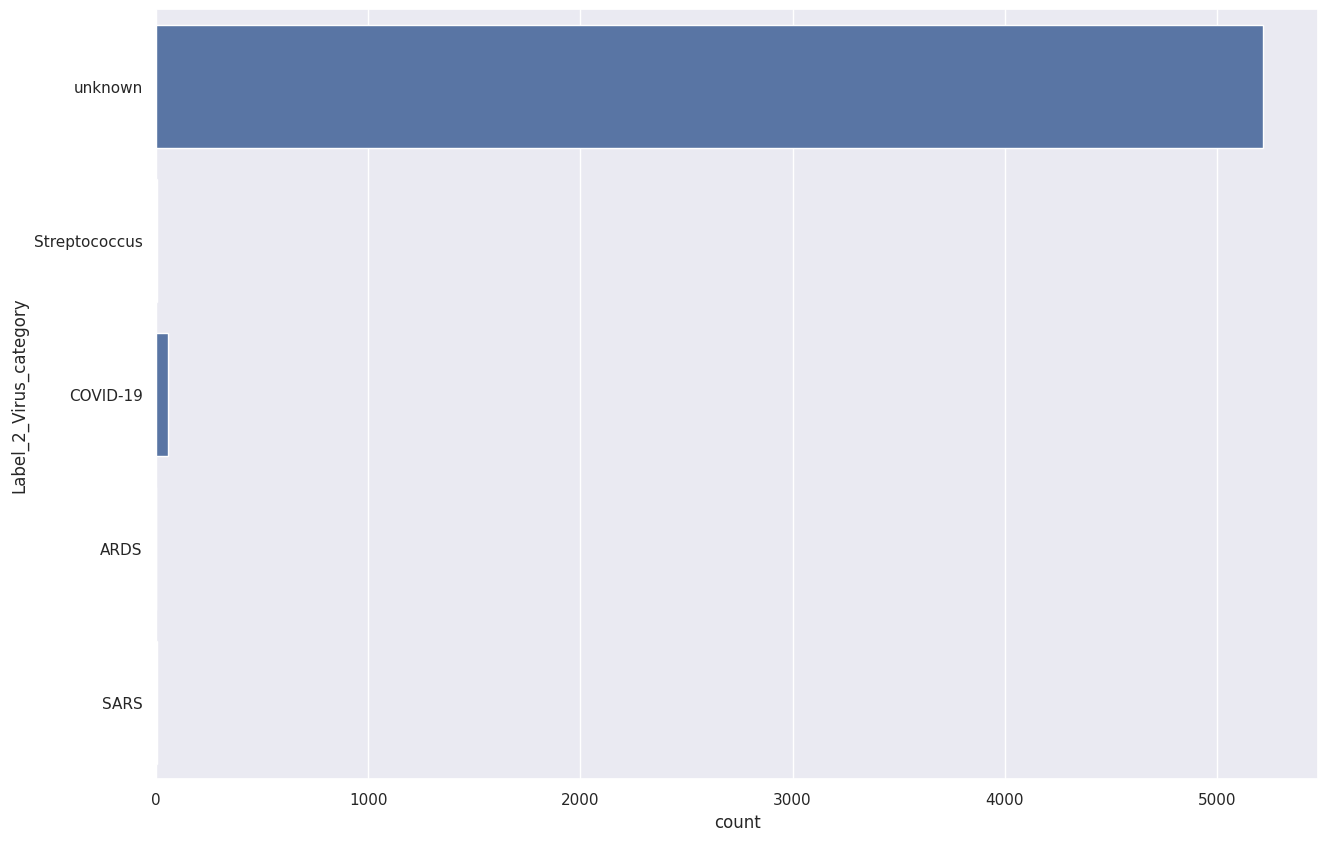

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(train_data['Label_2_Virus_category']);

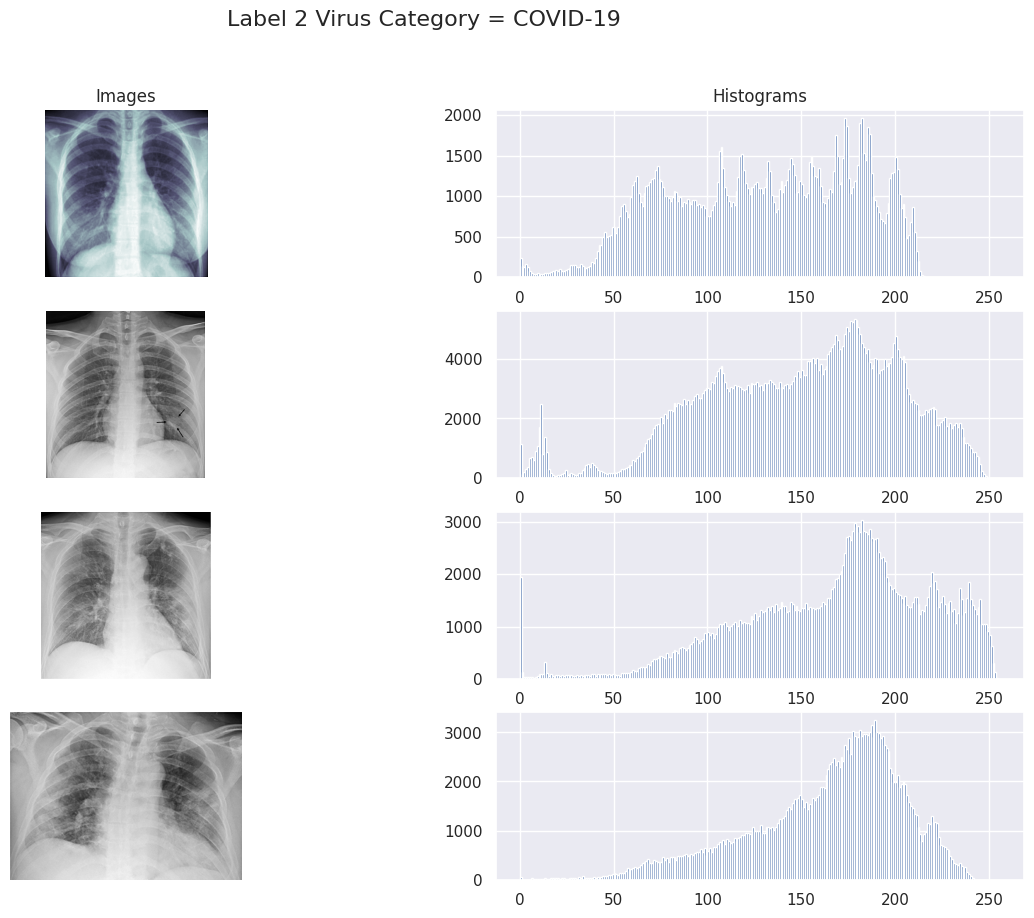

In [17]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))


covid_path = train_data[train_data['Label_2_Virus_category']=='COVID-19']['X_ray_image_name'].values


sample_covid_path = covid_path[:4]
sample_covid_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_covid_path))


for row, file in enumerate(sample_covid_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label 2 Virus Category = COVID-19', size=16)
plt.show()

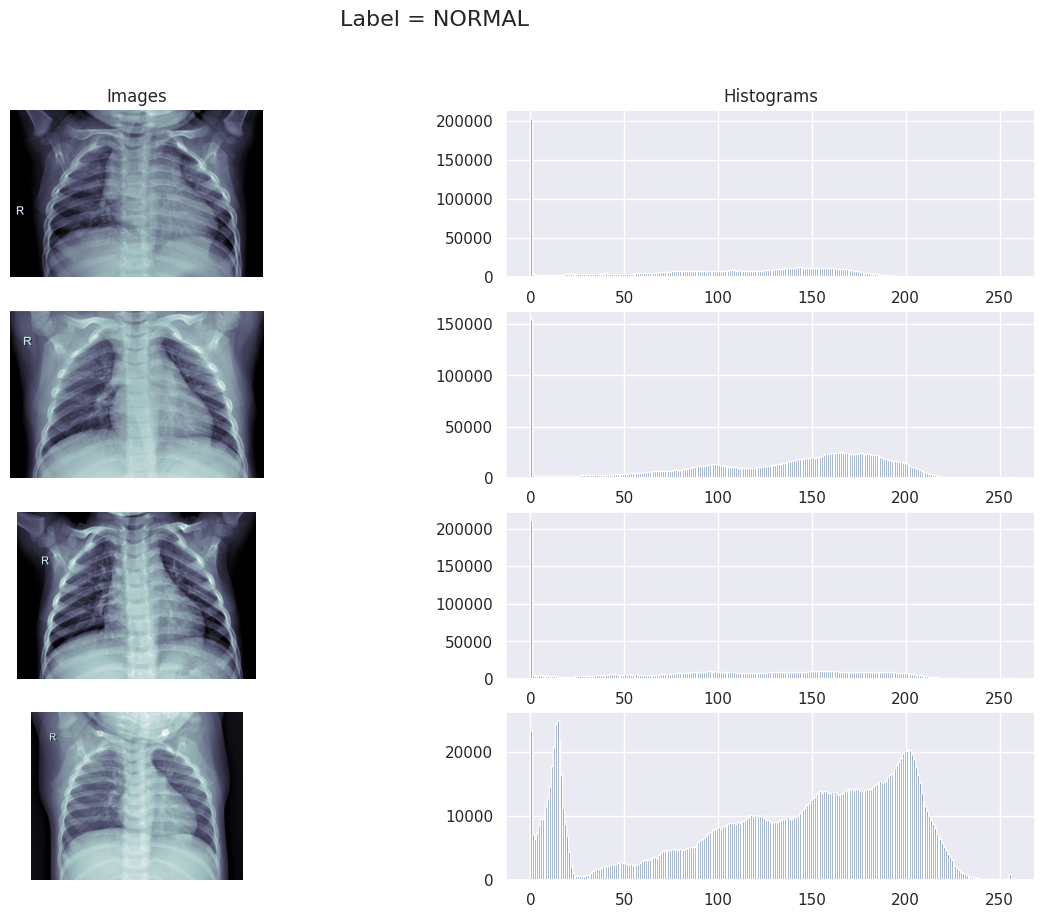

In [18]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))



normal_path = train_data[train_data['Label']=='Normal']['X_ray_image_name'].values


sample_normal_path = normal_path[:4]
sample_normal_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_normal_path))


for row, file in enumerate(sample_normal_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = NORMAL', size=16)
plt.show()

In [19]:
final_train_data = train_data[(train_data['Label'] == 'Normal') |
                              ((train_data['Label'] == 'Pnemonia') &
                               (train_data['Label_2_Virus_category'] == 'COVID-19'))]


final_train_data['class'] = final_train_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
test_data['class'] = test_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')


final_train_data['target'] = final_train_data.Label.apply(lambda x: 0 if x=='Normal' else 1)
test_data['target'] = test_data.Label.apply(lambda x: 0 if x=='Normal' else 1)


final_train_data = final_train_data[['X_ray_image_name', 'class', 'target', 'Label_2_Virus_category']]
final_test_data = test_data[['X_ray_image_name', 'class', 'target']]


test_data['Label'].value_counts()

,count
Label,
Pnemonia,390
Normal,234


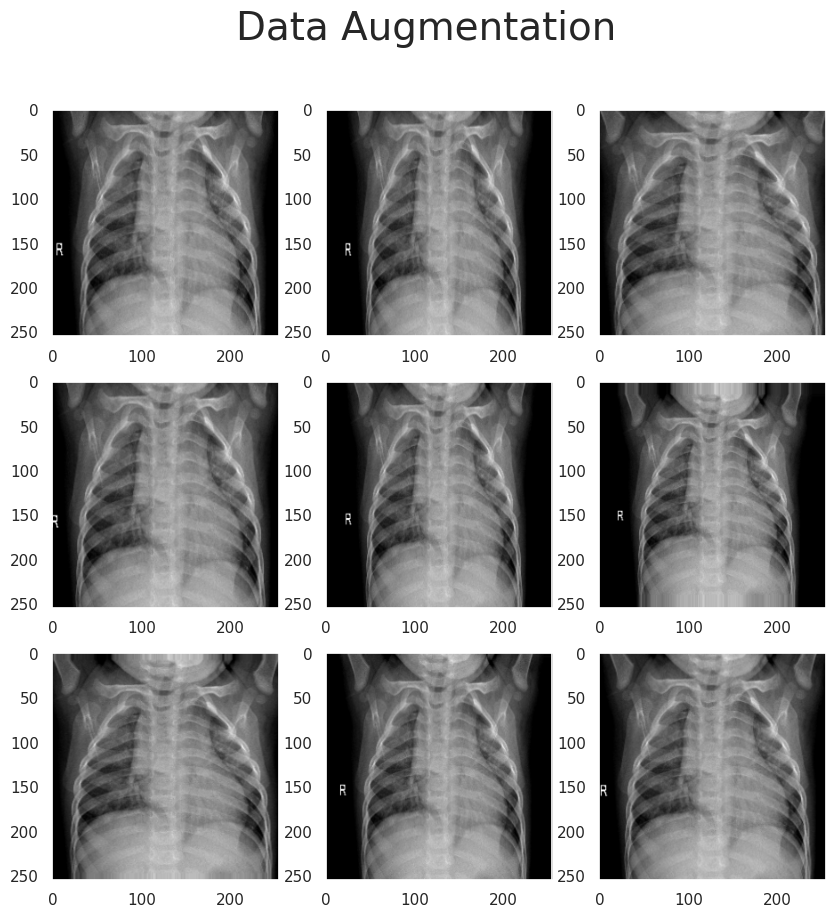

In [44]:
from keras.preprocessing import image
import os
import numpy as np
datagen =  ImageDataGenerator(
  shear_range=0.2,
  zoom_range=0.2,
)


def read_img(filename, size, path):
    img = image.load_img(os.path.join(path, filename), target_size=size)
    #convert image to array
    img = image.img_to_array(img) / 255
    return img


samp_img = read_img(final_train_data['X_ray_image_name'][0],
                                 (255,255),
                                 train_img_dir)

plt.figure(figsize=(10,10))
plt.suptitle('Data Augmentation', fontsize=28)


i = 0


for batch in datagen.flow(tf.expand_dims(samp_img,0), batch_size=6):
    plt.subplot(3, 3, i+1)
    plt.grid(False)
    plt.imshow(batch.reshape(255, 255, 3));

    if i == 8:
        break
    i += 1

plt.show();

In [45]:
corona_df = final_train_data[final_train_data['Label_2_Virus_category'] == 'COVID-19']
with_corona_augmented = []


def augment(name):
    img = read_img(name, (255,255), train_img_dir)
    i = 0
    for batch in tqdm(datagen.flow(tf.expand_dims(img, 0), batch_size=32)):
        with_corona_augmented.append(tf.squeeze(batch).numpy())
        if i == 20:
            break
        i =i+1


corona_df['X_ray_image_name'].apply(augment)

20it [00:00, 67.11it/s]
20it [00:00, 45.57it/s]
20it [00:00, 32.07it/s]
20it [00:00, 43.98it/s]
20it [00:00, 66.91it/s]
20it [00:00, 64.86it/s]
20it [00:00, 59.60it/s]
20it [00:00, 68.13it/s]
20it [00:00, 64.34it/s]
20it [00:00, 61.66it/s]
20it [00:00, 68.88it/s]
20it [00:00, 67.45it/s]
20it [00:00, 63.73it/s]
20it [00:00, 64.63it/s]
20it [00:00, 37.40it/s]
20it [00:00, 35.53it/s]
20it [00:00, 38.56it/s]
20it [00:00, 38.87it/s]
20it [00:00, 38.48it/s]
20it [00:00, 37.81it/s]
20it [00:00, 36.45it/s]
20it [00:00, 35.80it/s]
20it [00:00, 44.05it/s]
20it [00:00, 65.40it/s]
20it [00:00, 64.50it/s]
20it [00:00, 61.51it/s]
20it [00:00, 65.86it/s]
20it [00:00, 64.44it/s]
20it [00:00, 62.71it/s]
20it [00:00, 68.29it/s]
20it [00:00, 65.02it/s]
20it [00:00, 63.82it/s]
20it [00:00, 67.24it/s]
20it [00:00, 61.61it/s]
20it [00:00, 61.52it/s]
20it [00:00, 67.87it/s]
20it [00:00, 62.52it/s]
20it [00:00, 62.58it/s]
20it [00:00, 65.44it/s]
20it [00:00, 61.65it/s]
20it [00:00, 64.96it/s]
20it [00:00, 67.

,X_ray_image_name
5221,None
5222,None
5223,None
5224,None
5225,None
5226,None
5227,None
5228,None
5229,None
5230,None


In [27]:
train_arrays = []
final_train_data['X_ray_image_name'].apply(lambda x: train_arrays.append(read_img(x, (255,255), train_img_dir)))
test_arrays = []
final_test_data['X_ray_image_name'].apply(lambda x: test_arrays.append(read_img(x, (255,255), test_img_dir)))


print(len(train_arrays))
print(len(test_arrays))
y_train = np.concatenate((np.int64(final_train_data['target'].values), np.ones(len(with_corona_augmented), dtype=np.int64)))

1400
624


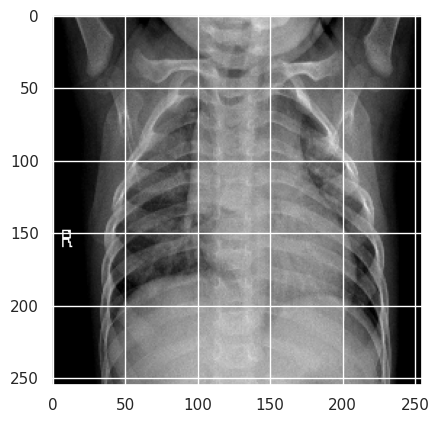

In [28]:
train_tensors = tf.convert_to_tensor(np.concatenate((np.array(train_arrays), np.array(with_corona_augmented))))
test_tensors  = tf.convert_to_tensor(np.array(test_arrays))
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(final_test_data['target'].values)


train_dataset = tf.data.Dataset.from_tensor_slices((train_tensors, y_train_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((test_tensors, y_test_tensor))


for i,l in train_dataset.take(1):
    plt.imshow(i);

In [29]:
BATCH_SIZE = 16
BUFFER = 1000

train_batches = train_dataset.shuffle(BUFFER).batch(BATCH_SIZE)
test_batches = test_dataset.batch(BATCH_SIZE)


for i,l in train_batches.take(1):
    print('Train Shape per Batch: ',i.shape);
for i,l in test_batches.take(1):
    print('Test Shape per Batch: ',i.shape);

Train Shape per Batch:  (16, 255, 255, 3)
Test Shape per Batch:  (16, 255, 255, 3)


In [30]:
INPUT_SHAPE = (255,255,3)

base_model = tf.keras.applications.ResNet50(input_shape= INPUT_SHAPE,
                                               include_top=False,
                                               weights='imagenet')


# We set it to False because we don't want to mess with the pretrained weights of the model.
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [31]:
for i,l in train_batches.take(1):
    pass
base_model(i).shape

TensorShape([16, 8, 8, 2048])

In [33]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D()) # Changed: Call GlobalAveragePooling2D directly
model.add(Dense(128)) # Changed: Call Dense directly
model.add(Dropout(0.2)) # Changed: Call Dropout directly
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [34]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(train_batches, epochs=10, validation_data=test_batches, callbacks=[callbacks])

Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 820s 5s/step - accuracy: 0.7958 - loss: 0.7142 - val_accuracy: 0.7276 - val_loss: 0.5324
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 863s 5s/step - accuracy: 0.8956 - loss: 0.3258 - val_accuracy: 0.7372 - val_loss: 0.5972
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 803s 5s/step - accuracy: 0.9227 - loss: 0.2358 - val_accuracy: 0.7340 - val_loss: 0.6297


In [41]:
pred = np.argmax(model.predict(np.array(test_arrays)), axis=-1)

# classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_data['target'], pred.flatten()))

20/20 ━━━━━━━━━━━━━━━━━━━━ 158s 8s/step
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       234
           1       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



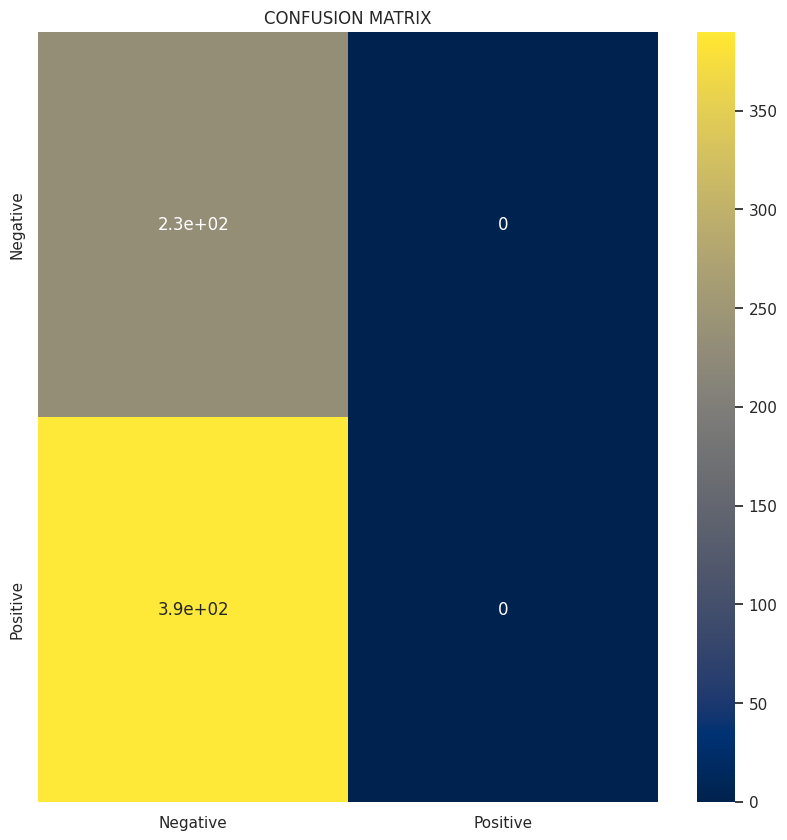

In [42]:
con_mat = confusion_matrix(test_data['target'], pred.flatten())
plt.figure(figsize = (10,10))
plt.title('CONFUSION MATRIX')
sns.heatmap(con_mat, cmap='cividis',
            yticklabels=['Negative', 'Positive'],
            xticklabels=['Negative', 'Positive'],
            annot=True);